# TASK1 K-medoids

In [24]:
#pip install scikit-learn-extra
#pip install pyclust
#pip install treelib

In [25]:
from pyclust import KMedoids
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

In [26]:
data=pd.read_csv("housing.csv")
X = data[['housing_median_age', 'total_rooms', 'median_house_value']]
X.head()

,housing_median_age,total_rooms,median_house_value
0,41.0,880.0,452600.0
1,21.0,7099.0,358500.0
2,52.0,1467.0,352100.0
3,52.0,1274.0,341300.0
4,52.0,1627.0,342200.0


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1)K=2

In [28]:
kmedoids = KMedoids(n_clusters=2)
kmedoids.fit(X_scaled)
y_kmed = kmedoids.fit_predict(X_scaled)

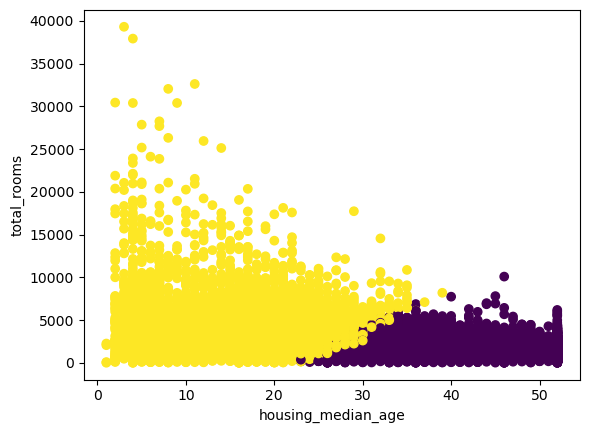

In [29]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmed)
plt.xlabel('housing_median_age')
plt.ylabel('total_rooms')
plt.show()

# 2)K=3

In [30]:
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X_scaled)
y_kmed = kmedoids.fit_predict(X_scaled)

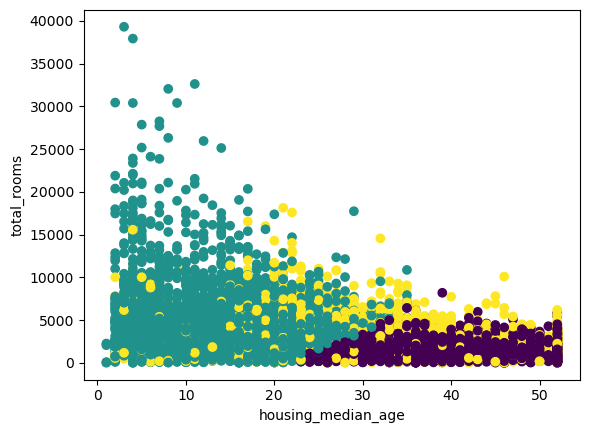

In [31]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmed)
plt.xlabel('housing_median_age')
plt.ylabel('total_rooms')
plt.show()

# Using Silhouette Coefficient Evaluate the Perfect K Value

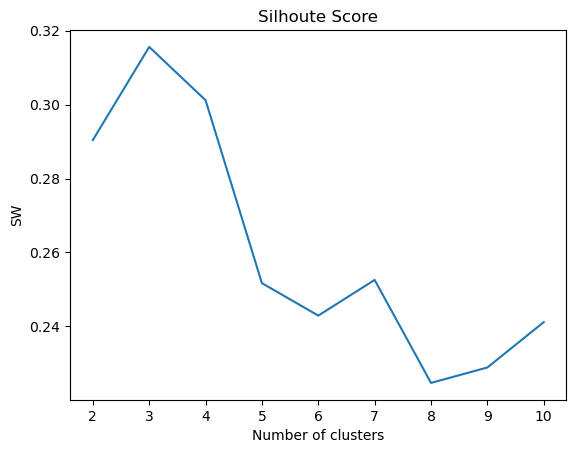

In [32]:
sw = []
for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(X_scaled)
    y_kmed = kMedoids.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_kmed)
    sw.append(silhouette_avg)
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

# Running Time

In [33]:
from timeit import default_timer
start = default_timer()
duration = default_timer() - start
print(duration)

0.0002079579999190173
